## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

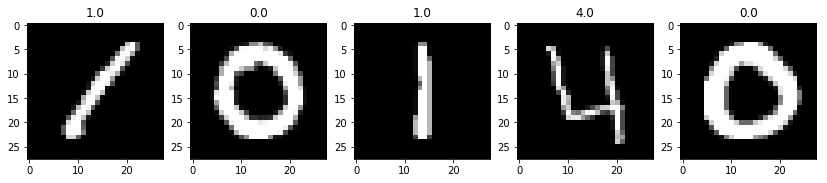

In [5]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [6]:
y = train_label

In [7]:
def reduc (imag):
    X = imag.reshape(-1, 28 * 28).astype(np.float32)
        # центрируем данные
    X_mean = X.mean(axis=0)
    X -= X_mean
        # матрица ковариации признаков
    cov = np.dot(X.T, X) / X.shape[0]
        # U - собсвенные вектора матрицы ковариации
        # S - собственные значения
    U, S, _ = np.linalg.svd(cov)
        # накопленная сумма собственных значений
    S_cumsum = np.cumsum(S) / np.sum(S)
    S_thr = 0.9  # задаем порог для накопленной суммы собственных значений
        # определяем необходимое число компонент для заданного порога
    n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))
        # получаем сжатое представление объектов
    Xrot_reduced = np.dot(X, U[:, :n_comp])
    
    return Xrot_reduced

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduc(train_img), y, test_size=0.2, random_state=0)  

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors = 4), X_train, y_train, cv = 10, scoring = 'accuracy' )

array([0.96908442, 0.96046373, 0.96699376, 0.97204045, 0.97293278,
       0.97083333, 0.97290054, 0.96961573, 0.97020262, 0.96899225])

In [11]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [12]:
y_pred = model.predict(X_train)

In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_train, y_pred))

Accuracy: 0.9816964285714286


In [14]:
pred_test = model.predict(reduc(test_img))

In [15]:
pred = pred_test.astype(int)

In [16]:
with open('submit1.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred, 1):
        dst.write('%s,%s\n' % (i, p))